In [1]:
import random
import time
import numpy as np
rng = np.random.default_rng()
import math
import sys
from numpy import linalg as LA
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/kaggle/input/chi-filter-1500-uci/chi-filter_uci_1500.csv')
test_df = pd.read_csv('/kaggle/input/merged-features-img90/merged_X_feature_img90_test.csv')
#Y_train = pd.read_csv('/kaggle/input/y-classified-train-test/Y.csv')
Y_test = pd.read_csv('/kaggle/input/y-classified-train-test/Y_test.csv')
Y_train=train_df["class"]
# converting column without decimal to integer
for col in train_df.columns:
    if np.sum((train_df[col] - train_df[col].astype('int'))) == 0:
        train_df[col] = train_df[col].astype('int')
        
for col in test_df.columns:
    if np.sum((test_df[col] - test_df[col].astype('int'))) == 0:
        test_df[col] = test_df[col].astype('int')

In [3]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [4]:
train_df.head()

,0,2,3,14,16,25,27,29,35,36,...,5446,5481,5503,5508,5541,5549,5600,5609,5616,class
0,2686.5190,2159.4392,6715.6904,3894.8923,648.51294,1520.87550,3222.7430,1207.85990,1636.64380,1053.14820,...,168.435090,234.622830,429.20220,353.24857,365.500200,730.12115,346.24185,236.596940,339.24155,1
1,1353.2506,1176.6947,3761.5742,1936.5485,157.07024,1038.01310,1851.4475,587.28880,909.56560,645.02250,...,239.062760,192.524430,394.78410,286.31024,383.847100,219.54054,103.24392,184.068180,161.80974,1
2,2124.5488,1701.7424,5732.0610,2843.8118,327.28983,1480.78450,2750.8416,961.16693,1250.15860,986.08210,...,0.000000,0.000000,0.00000,0.00000,217.781300,378.17610,1602.99560,337.919070,348.30206,1
3,1973.7145,1505.5026,5204.3520,2556.0354,352.12750,1351.43880,2294.2097,857.76270,1124.77610,943.05180,...,0.562264,39.612076,104.69726,275.36484,51.113052,199.95763,275.94122,32.385693,207.92162,1
4,1280.7573,1048.9443,3601.7375,1685.0039,266.37418,838.33057,1681.4880,517.17580,580.94354,528.84515,...,848.548770,739.170900,0.00000,109.22951,732.401300,1572.69710,264.75214,816.652500,395.23355,1


In [5]:
Y_train.shape

(7352,)

In [6]:
print(f'Number of rows: {train_df.shape[0]};  Number of columns: {train_df.shape[1]}; No of missing values: {sum(train_df.isna().sum())}')

Number of rows: 7352;  Number of columns: 1501; No of missing values: 0


In [7]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5622,5623,5624,5625,5626,5627,5628,5629,5630,5631
0,1774.63320,0.0,1515.9840,5011.9800,0,0,0,0,0,0,...,216.66359,0.00000,0.000000,0.0,94.545395,0.00000,372.582900,0.0,49.745007,444.54483
1,2002.37770,0.0,1673.6188,5564.8867,0,0,0,0,0,0,...,53.84006,0.00000,31.464163,0.0,0.000000,0.00000,18.144201,0.0,55.885147,77.76878
2,985.83923,0.0,773.8343,2890.0354,0,0,0,0,0,0,...,177.46591,0.00000,0.000000,0.0,432.978180,0.00000,548.971800,0.0,5.735138,125.38153
3,1490.57480,0.0,1117.6836,4054.4492,0,0,0,0,0,0,...,157.25223,509.28955,0.000000,0.0,0.000000,288.85593,105.889250,0.0,655.473100,447.50073
4,1293.47750,0.0,1008.7128,3321.8152,0,0,0,0,0,0,...,0.00000,13.65373,0.000000,0.0,367.171050,0.00000,418.528080,0.0,119.555710,243.71849


In [8]:
train_df=train_df.drop(['class' ], axis=1)

In [9]:
train_df.head()

,0,2,3,14,16,25,27,29,35,36,...,5425,5446,5481,5503,5508,5541,5549,5600,5609,5616
0,2686.5190,2159.4392,6715.6904,3894.8923,648.51294,1520.87550,3222.7430,1207.85990,1636.64380,1053.14820,...,83.901825,168.435090,234.622830,429.20220,353.24857,365.500200,730.12115,346.24185,236.596940,339.24155
1,1353.2506,1176.6947,3761.5742,1936.5485,157.07024,1038.01310,1851.4475,587.28880,909.56560,645.02250,...,0.000000,239.062760,192.524430,394.78410,286.31024,383.847100,219.54054,103.24392,184.068180,161.80974
2,2124.5488,1701.7424,5732.0610,2843.8118,327.28983,1480.78450,2750.8416,961.16693,1250.15860,986.08210,...,690.339840,0.000000,0.000000,0.00000,0.00000,217.781300,378.17610,1602.99560,337.919070,348.30206
3,1973.7145,1505.5026,5204.3520,2556.0354,352.12750,1351.43880,2294.2097,857.76270,1124.77610,943.05180,...,147.716480,0.562264,39.612076,104.69726,275.36484,51.113052,199.95763,275.94122,32.385693,207.92162
4,1280.7573,1048.9443,3601.7375,1685.0039,266.37418,838.33057,1681.4880,517.17580,580.94354,528.84515,...,0.000000,848.548770,739.170900,0.00000,109.22951,732.401300,1572.69710,264.75214,816.652500,395.23355


In [10]:
best_col1000 = list(train_df.columns)

In [11]:

res = [eval(i) for i in best_col1000]
print("Modified list is: ", len(res))

Modified list is:  1500


In [12]:
print(f'Number of rows: {test_df.shape[0]};  Number of columns: {test_df.shape[1]}; No of missing values: {sum(test_df.isna().sum())}')

Number of rows: 2947;  Number of columns: 5632; No of missing values: 0


In [13]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [14]:
X_train = train_df.to_numpy()
y_train = Y_train.to_numpy()

In [15]:
Y_test.head()

,0
0,1
1,1
2,1
3,1
4,1


In [16]:
test_df1000=test_df.to_numpy()

In [17]:
X_test= test_df1000[:, res]

In [18]:
X_test.shape

(2947, 1500)

In [19]:
feat_list=list(train_df.keys())
len(feat_list)

1500

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [21]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from numpy.random import rand
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import xgboost as xg


# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [22]:
from sklearn.svm import SVC

In [23]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d]  = 1
            else:
                Xbin[i,d]  = 0
    
    return Xbin

In [24]:
# error rate
def error_rate(xtrain, ytrain, x):
    # parameters
    xt, xv, yt, yv = train_test_split(xtrain, ytrain, test_size=0.25, shuffle=True)
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    x_train = xt[:, x == 1]
    y_train = yt.reshape(num_train)
    x_valid = xv[:, x == 1]
    y_valid = yv.reshape(num_valid)
    # Training
    #mdl     = LinearRegression()
    #mdl.fit(xtrain, ytrain)
    #X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size = 0.25)
    clf = LinearRegression() 
    clf.fit(x_train, y_train)
    #accuracy = clf.score(xv,yv)

    #print('Accuracy: ',accuracy)
    # Prediction
    ypred   = clf.predict(x_valid)
    error   = mean_squared_error(y_valid, ypred, squared=False)
    print(error)
    return error

In [25]:
def fun(x, xtrain, ytrain):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    thres = 0.5
    # original feature size
    max_feat = np.size(xtrain, 1)
    print(max_feat)
    
    # Number of selected features
    num_feat = np.sum(x == 1)
    print(num_feat)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        print(cost)
    return cost

# This function is to initialize the Honey Badger population.
def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random()*(ub[j] - lb[j]) + lb[j]
    return X

# Calculate fitness values for each Honey Badger.
def CaculateFitness1(X,fun, X_train, y_train):
    fitness = fun(X, X_train, y_train)
    print(fitness)
    return fitness

# Sort fitness.
def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness,index


# Sort the position of the Honey Badger according to fitness.
def SortPosition(X,index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i,:] = X[index[i],:]
    return Xnew


# Boundary detection function.
def BorderCheck1(X,lb,ub,dim):
        for j in range(dim):
            if X[j]<lb[j]:
                X[j] = ub[j]
            elif X[j]>ub[j]:
                X[j] = lb[j]
        return X
def Intensity(pop,GbestPositon,X):
  epsilon = 0.00000000000000022204
  di = np.zeros(pop)
  S = np.zeros(pop)
  I = np.zeros(pop)
  for j in range(pop):
    if (j <= pop):
      di[j]=LA.norm([[X[j,:]-GbestPositon+epsilon]])
      S[j]= LA.norm([X[j,:]-X[j+1,:]+epsilon])
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)
    else:
      di[j]=[ LA.norm[[X[pop,:]-GbestPositon+epsilon]]]
      S[j]=[LA.norm[[X[pop,:]-X[1,:]+epsilon]]]
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)    
  
    for i in range(pop):
      n = random.random()
      I[i] = n*S[i]/[4*math.pi*di[i]]
    return I

In [26]:
def hba(pop,dim,lb,ub,Max_iter,fun, X_train, y_train):
    X = initial(pop, dim, lb,ub)                    # Initialize the number of honey badgers
    fitness = np.zeros([pop, 1])
    for i in range(pop):
      print("Calculate fitness Iteration:", i + 1)
      # Binary conversion
      Xbin = binary_conversion(X, 0.5, pop, dim)
      fitness[i] = CaculateFitness1(Xbin[i, :], fun, X_train, y_train)
    fitness, sortIndex = SortFitness(fitness)       # Sort the fitness values of honey badger.
    X = SortPosition(X, sortIndex)                  # Sort the honey badger.
    GbestScore = fitness[0]                         # The optimal value for the current iteration.
    GbestPositon = np.zeros([1, dim])
    GbestPositon[0, :] = X[0, :]
    Curve = np.zeros([Max_iter, 1])
    C = 2                                          # constant in Eq. (3)
    beta = 6                                       # the ability of HB to get the food  Eq.(4)
    vec_flag=[1,-1]
    vec_flag=np.array(vec_flag)
    Xnew = np.zeros([pop, dim])
    for t in range(Max_iter):
        print("Digging and honey phase, iteration: ",t+1)
        alpha=C*math.exp(-t/Max_iter);             # density factor in Eq. (3)
        I=Intensity(pop,GbestPositon,X);           # intensity in Eq. (2)
        Vs=random.random()
        for i in range(pop):
          print("Population, iteration: ",i+1)
          Vs=random.random()
          F=vec_flag[math.floor((2*random.random()))]
          for j in range(dim):
            di=GbestPositon[0,j]-X[i,j]
            if (Vs <0.5):                           # Digging phase Eq. (4)
              r3=np.random.random()
              r4=np.random.randn()
              r5=np.random.randn()
              Xnew[i,j]=GbestPositon[0,j] +F*beta*I[i]* GbestPositon[0,j]+F*r3*alpha*(di)*np.abs(math.cos(2*math.pi*r4)*(1-math.cos(2*math.pi*r5)));
            else:
              r7=random.random()
              Xnew[i,j]=GbestPositon[0,j]+F*r7*alpha*di;    # Honey phase Eq. (6)
          #print(di)
          Xnew[i,:] = BorderCheck1(Xnew[i,:], lb, ub, dim)
          tempFitness = CaculateFitness1(Xnew[i,:], fun, X_train, y_train)
          if (tempFitness <= fitness[i]):
            fitness[i] = tempFitness               
            X[i,:] = Xnew[i,:] 
        for i in range(pop):                         
          X[i,:] = BorderCheck1(X[i,:], lb, ub ,dim)
        Ybest,index = SortFitness(fitness)               # Sort fitness values.
        if (Ybest[0] <= GbestScore):                          
          GbestScore = Ybest[0]     # Update the global optimal solution.
          GbestPositon[0, :] = X[index[0], :]           # Sort fitness values 
        Curve[t] = GbestScore
    return GbestScore,GbestPositon,Curve


In [27]:
rng = np.random.default_rng()
time_start = time.time()
pop = 10                    # Honey Badger population size.
MaxIter = 300               # Maximum number of iterations.
dim = np.size(xtrain, 1)                    # The dimension.
fl=-1                    # The lower bound of the search interval.
ul=1                      # The upper bound of the search interval.
lb = fl*np.ones([dim, 1])
ub = ul*np.ones([dim, 1])
GbestScore, GbestPositon, Curve = hba(pop, dim, lb, ub, MaxIter, fun,X_train, y_train )
time_end = time.time()
print(f"The running time is: {time_end  - time_start } s")
print('The optimal value：',GbestScore)
print('The optimal solution：',GbestPositon)


Calculate fitness Iteration: 1
1500
364
0.5163456224185079
0.5136088328609895
0.5136088328609895
Calculate fitness Iteration: 2
1500
391
0.5116230840067773
0.5091135198333762
0.5091135198333762
Calculate fitness Iteration: 3
1500
369
0.5201669277378536
0.517425258460475
0.517425258460475
Calculate fitness Iteration: 4
1500
382
0.5303856222655247
0.5276284327095361
0.5276284327095361
Calculate fitness Iteration: 5
1500
370
0.52186974744192
0.5191177166341675
0.5191177166341675
Calculate fitness Iteration: 6
1500
383
0.5074983445973481
0.5049766944847079
0.5049766944847079
Calculate fitness Iteration: 7
1500
375
0.5289999798616393
0.5262099800630229
0.5262099800630229
Calculate fitness Iteration: 8
1500
373
0.5077524621604883
0.50516160420555
0.50516160420555
Calculate fitness Iteration: 9
1500
401
0.5365530363178529
0.5338608392880076
0.5338608392880076
Calculate fitness Iteration: 10
1500
364
0.5066548075307368
0.5040149261220961
0.5040149261220961
Digging and honey phase, iteration:  

In [28]:
GbestPositon.shape

(1, 1500)

In [43]:
Sel_feat = np.zeros([1, 1500], dtype='int')
for i in range(1):
        for d in range(1500):
            if GbestPositon[i,d] > 0:
                Sel_feat[i,d] = 1
            else:
                Sel_feat[i,d] = 0

In [44]:
si=Sel_feat.flatten()

In [45]:
si.shape

(1500,)

In [46]:
ind=np.argwhere(si)

In [47]:
selind=ind.flatten()

In [48]:
s_ind=list(selind)

In [49]:
X_train.shape

(7352, 1500)

In [50]:
Xtr= X_train[:, s_ind]

In [51]:
Xtr.shape

(7352, 767)

In [52]:
x_tr, x_te, y_tr, y_te = train_test_split(Xtr, y_train, test_size=0.20, shuffle=True)
mdl2 = SVC(kernel='linear') 
mdl2.fit(x_tr, y_tr)
ac2 = mdl2.score(x_te,y_te)
print(ac2)

0.9360978925900748


In [53]:
from sklearn.metrics import confusion_matrix,classification_report
target_names=['1','2','3','4','5','6']
y_pre = mdl2.predict(x_te)
print(classification_report(y_te, y_pre, target_names=target_names))

              precision    recall  f1-score   support

           1       0.89      0.90      0.90       254
           2       0.90      0.90      0.90       230
           3       0.91      0.91      0.91       184
           4       0.96      0.94      0.95       267
           5       0.95      0.95      0.95       245
           6       0.99      0.99      0.99       291

    accuracy                           0.94      1471
   macro avg       0.93      0.93      0.93      1471
weighted avg       0.94      0.94      0.94      1471



In [63]:
# convert array into dataframe 
best_feat_X_tr = pd.DataFrame(Xtr) 
best_feat_Y_tr = pd.DataFrame(y_train)

# save the dataframe as a csv file 
best_feat_X_tr.to_csv("uci_har_best_feat_X_train767.csv")
best_feat_Y_tr.to_csv("uci_har_best_feat_Y_train767.csv")


In [64]:
# convert array into dataframe 
best_feat_X_te = pd.DataFrame(X_test) 
best_feat_Y_te = pd.DataFrame(Y_test)

# save the dataframe as a csv file 
best_feat_X_te.to_csv("uci_har_best_feat_X_test767.csv")
best_feat_Y_te.to_csv("uci_har_best_feat_Y_test767.csv")

In [57]:
import seaborn as sns
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [58]:
y_pre

array([1, 5, 6, ..., 2, 1, 2])

In [60]:
y_te

array([1, 5, 6, ..., 2, 2, 2])

In [61]:

y_p_l=[]
for i in y_pre:
    if i == 1:
        y_p_l.append('Walking')
    if i == 2:
        y_p_l.append('Walking Upstairs')
    if i == 3:
        y_p_l.append('Walking Downstairs')
    if i == 4:
        y_p_l.append('Sitting')
    if i == 5:
        y_p_l.append('Standing')
    if i == 6:
        y_p_l.append('Laying')


y_t_l=[]
for i in y_te:
    if i == 1:
        y_t_l.append('Walking')
    if i == 2:
        y_t_l.append('Walking Upstairs')
    if i == 3:
        y_t_l.append('Walking Downstairs')
    if i == 4:
        y_t_l.append('Sitting')
    if i == 5:
        y_t_l.append('Standing')
    if i == 6:
        y_t_l.append('Laying')

accuracy score: 0.9360978925900748
classification_report of model1:
                    precision    recall  f1-score   support

           Walking       0.89      0.90      0.90       254
  Walking Upstairs       0.90      0.90      0.90       230
Walking Downstairs       0.91      0.91      0.91       184
           Sitting       0.96      0.94      0.95       267
          Standing       0.95      0.95      0.95       245
            Laying       0.99      0.99      0.99       291

          accuracy                           0.94      1471
         macro avg       0.93      0.93      0.93      1471
      weighted avg       0.94      0.94      0.94      1471



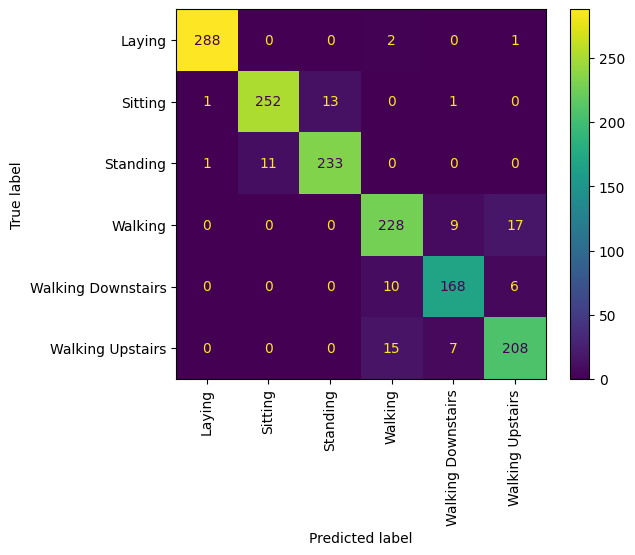

In [62]:
print('accuracy score:',acc(y_te,y_pre))
target_names=['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
print("classification_report of model1:")
print(classification_report(y_te,y_pre, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
   y_t_l,y_p_l,xticks_rotation="vertical")
plt.show()

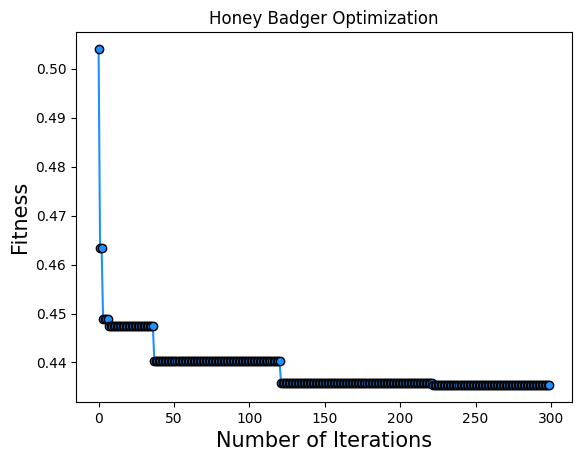

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot( Curve,color='dodgerblue', marker='o', markeredgecolor='k', markerfacecolor='dodgerblue')

ax.set_xlabel('Number of Iterations',fontsize=15)
ax.set_ylabel('Fitness',fontsize=15)
ax.set_title('Honey Badger Optimization')
plt.show()


